Upload data to sqlite tables.

In [1]:
import pandas as pd
import numpy as np
from IPython import display as dis
import scipy.io.wavfile as wav
import tensorflow as tf
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import basic_rnn_seq2seq
from tensorflow.contrib.rnn import RNNCell, LSTMCell, MultiRNNCell
from scipy import signal 
from librosa import core
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
import time

%matplotlib inline

In [2]:
x_y = pd.read_pickle("dataset/x_y.pkl")
x_y = x_y.sample(frac=1)

In [3]:
time_step = 1000
hidden_layers = 1
batch_size = 1000
feature_count = 1
latent_dim = 61 
rate=8000
window_size=time_step

In [4]:
x_y

,sigs,emotion
file_name,,
Ses01F_script01_2_F005,"[[0.00558454], [0.00774629], [0.00480964], [0....",Anger
Ses01F_script01_2_F003,"[[0.000666159], [0.002329], [0.0018076], [0.00...",Anger
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise
Ses01F_script01_2_F008,"[[-0.0123134], [-0.011237], [-0.00331681], [-0...",Anger
Ses01F_script01_1_F011,"[[0.00182344], [0.00303931], [0.00144879], [0....",Frustration
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration
Ses01F_script01_1_F026,"[[-0.00135279], [-0.00133179], [-0.000726668],...",Neutral state
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state
Ses01F_script01_3_F010,"[[-0.00232578], [-0.00357799], [-0.00077987], ...",Happiness


In [5]:
dis.Audio(data = x_y.iloc[-1,:].sigs.ravel(), rate = rate )

Signal [ 0.00378319  0.0061017   0.00418374 ..., -0.00245465 -0.00360791  0.        ]


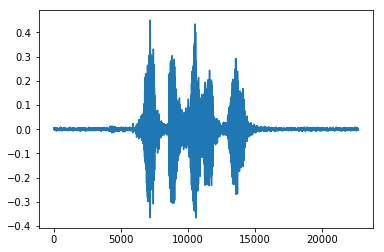

In [6]:
print("Signal",x_y.iloc[-1,:].sigs.ravel())
plt.plot(x_y.iloc[-1,:].sigs.ravel())

In [7]:
#x_y.loc[:,"sequence_length"] = None
#x_y.loc[:,"max"] = None

#time_step = max([sig.shape[0] for sig in x_y.sigs ])
print(time_step)

1000


In [8]:
#for index, row in x_y.iterrows():
#    sig = row.sigs
#    row.sequence_length = sig.shape[0]
#    row.max = max(abs(sig))
#    sig = sig / row.max
#    sig = np.concatenate((sig, np.zeros((time_step - row.sequence_length,1))))
#    #sig = np.pad(sig, (0, time_step - row.sequence_length), mode = "constant")
#    sig = np.reshape(sig, (1,-1, 1)) 
#    row.sigs = sig 

In [9]:
for index, row in x_y.iterrows():
    sig = row.sigs.ravel()
    sig = np.resize(sig, (len(sig) - len(sig)%window_size,))
    sig = sig.reshape((-1, window_size))
    row.sigs = sig 

In [10]:
x_y.loc[:,'file_num'] = np.arange(0,x_y.shape[0], 1)

x_y

,sigs,emotion,file_num
file_name,,,
Ses01F_script01_2_F005,"[[0.00558454, 0.00774629, 0.00480964, 0.005151...",Anger,0
Ses01F_script01_2_F003,"[[0.000666159, 0.002329, 0.0018076, 0.00172252...",Anger,1
Ses01F_script01_1_F002,"[[0.00105559, 0.00139954, 0.00106059, 0.001033...",Surprise,2
Ses01F_script01_2_F008,"[[-0.0123134, -0.011237, -0.00331681, -0.01051...",Anger,3
Ses01F_script01_1_F011,"[[0.00182344, 0.00303931, 0.00144879, 0.000565...",Frustration,4
Ses01F_script01_1_F000,"[[-0.00154565, -0.00232982, -0.00185985, -0.00...",Frustration,5
Ses01F_script01_1_F026,"[[-0.00135279, -0.00133179, -0.000726668, 0.00...",Neutral state,6
Ses01F_script01_1_F005,"[[0.00254852, 0.00376644, 0.00339257, 0.004608...",Neutral state,7
Ses01F_script01_3_F010,"[[-0.00232578, -0.00357799, -0.00077987, -0.00...",Happiness,8


In [11]:
le = LabelEncoder()
x_y.emotion = le.fit_transform(x_y.emotion)
x_y

,sigs,emotion,file_num
file_name,,,
Ses01F_script01_2_F005,"[[0.00558454, 0.00774629, 0.00480964, 0.005151...",0,0
Ses01F_script01_2_F003,"[[0.000666159, 0.002329, 0.0018076, 0.00172252...",0,1
Ses01F_script01_1_F002,"[[0.00105559, 0.00139954, 0.00106059, 0.001033...",6,2
Ses01F_script01_2_F008,"[[-0.0123134, -0.011237, -0.00331681, -0.01051...",0,3
Ses01F_script01_1_F011,"[[0.00182344, 0.00303931, 0.00144879, 0.000565...",2,4
Ses01F_script01_1_F000,"[[-0.00154565, -0.00232982, -0.00185985, -0.00...",2,5
Ses01F_script01_1_F026,"[[-0.00135279, -0.00133179, -0.000726668, 0.00...",4,6
Ses01F_script01_1_F005,"[[0.00254852, 0.00376644, 0.00339257, 0.004608...",4,7
Ses01F_script01_3_F010,"[[-0.00232578, -0.00357799, -0.00077987, -0.00...",3,8


In [12]:
sigs = None

for index, row in x_y.iterrows():
    sig = row.sigs
    #print(sig.shape)
    file_num = row.file_num
    file_num = np.repeat(file_num, sig.shape[0]).reshape(-1,1)
    emotion = np.repeat(row.emotion, sig.shape[0]).reshape(-1,1)
    
    seq = np.arange(0,sig.shape[0],1).reshape(-1,1)
    #print(file_num.shape)
    sig = np.concatenate((sig, emotion, file_num, seq), axis = 1)
    #print(sig[:,-2:])
    if(sigs is None):
        sigs = sig
    else:
        sigs = np.concatenate((sigs, sig))
    
np.random.shuffle(sigs)
print(sigs.shape)
print("Signal",sigs[-1], "Rate", rate, "Max time step:", time_step)


(1823, 1003)
Signal [ -3.11007742e-02  -2.52599288e-02  -3.27035859e-02 ...,   0.00000000e+00
   1.60000000e+01   3.90000000e+01] Rate 8000 Max time step: 1000


In [13]:
class Data(object):
    x = sigs[:,:-3][...,np.newaxis] #+ np.random.normal(scale=0.01, size = sigs[:,:-3][...,np.newaxis].shape)
    y_ = sigs[:,:-3][...,np.newaxis]
    f = sigs[:,-2]
    s = sigs[:,-1]
    e = sigs[:,-3]
    print(e)
    
    #shift
    y_ = y_[:,1:] #np.roll(y_, 1, axis = 1)[1:,:]
    x = x[:,:-1]
    print(x.shape)
    print(y_.shape)
    
   

[ 0.  1.  0. ...,  6.  0.  0.]
(1823, 999, 1)
(1823, 999, 1)


In [14]:
#["batch_size", "steps", "step_size", "feature_count"]
[batch_size, time_step, feature_count ]

[1000, 1000, 1]

In [15]:
class network(object):
    
    def __init__(self):
        pass
            
    def build_layers(self):
        
        tf.reset_default_graph()
        #learning_rate = tf.Variable(initial_value=0.001)

        global time_step 
        global batch_size 
        global hidden_layers
        global step_size
        global latent_dim
        
        with tf.variable_scope("Input"):
            self.x = tf.placeholder("float32", shape=[None, time_step-1, feature_count], name='x')
            self.y_ = tf.placeholder("float32", shape=[None, time_step-1, feature_count], name='y')
            self.keep_prob = tf.placeholder("float", name='kp')
            self.lr = tf.placeholder("float", name='lr')
            
        with tf.variable_scope("encoder"):
            enc_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #enc_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.state = enc_lstm.zero_state(batch_size, "float")
            print("State:",self.state)
            
            print("Audio Input:", self.x)
            self.enc_output, self.state = tf.nn.dynamic_rnn(enc_lstm, self.x, initial_state = self.state, parallel_iterations = 4)
            self.enc_state = self.state
            print("Encoder Output:",self.enc_output)

        with tf.variable_scope("decoder"):
            dec_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #dec_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.dec_output, self.state = tf.nn.dynamic_rnn(dec_lstm, self.enc_output, initial_state = self.state, parallel_iterations = 4)
            
            self.dec_output = tf.layers.dense(self.dec_output, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.output = tf.layers.dense(self.dec_output, units = 1, kernel_regularizer=tf.nn.l2_loss)
            print("Decoder Output:",self.dec_output)
            
        with tf.variable_scope("Optimize"):
            #loss = tf.contrib.seq2seq.sequence_loss(self.output, self.x, tf.ones(shape=[batch_size, time_step]))
            #self.loss = tf.losses.absolute_difference(tf.abs(self.y_), tf.abs(self.output))
            #self.loss = tf.reduce_sum(tf.abs(self.y_)) - tf.reduce_sum(tf.abs(self.output))
            #self.y__norm = tf.square(self.y_)
            #self.output_norm = tf.square(self.output) 
            self.loss = tf.losses.mean_squared_error(self.y_, self.output)
            #self.loss = tf.losses.huber_loss(self.y_, self.output)
            
            optimizer = tf.train.AdamOptimizer(self.lr)
            self.opti_op = optimizer.minimize(self.loss)
        print("Final Output:", self.output)

            
        

In [16]:
import collections

y_pred_list = []
final_state = None
Data.loss = []

class Train:    
    
    def train(net, epochs, lrs, x, y, f, s, e):
        global final_state
        
        with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            for lr in lrs:
                for epoch in range(1, epochs+1):
                    Data.out = pd.DataFrame(columns=['file_num', 'seq','x_out', 'y_out'])

                    Data.state_h = []
                    Data.state_c = []
                    
                    for i in range(0,x.shape[0],batch_size):
                        
                        x_train = x[i:i+batch_size,...]
                        y_train = y[i:i+batch_size,...]
                        f_train = f[i:i+batch_size]
                        s_train = s[i:i+batch_size]
                        e_train = e[i:i+batch_size]
                        if x_train.shape[0] < batch_size:
                            break;
                        net_output = sess.run(
                                            [net.opti_op, net.enc_state, 
                                             net.x, net.y_, 
                                             net.output, net.loss, 
                                             net.enc_output], #net.summary_op
                                              feed_dict={net.x: x_train, 
                                                         net.y_: y_train,
                                                         net.keep_prob:1,
                                                         net.lr:lr})
          
                        _, state, x_out, y_orig_out, y_out, loss, Data.enc = net_output    
                        print("Step {} lr {} Loss {}".format(epoch, lr, loss))
                        Data.loss.append(loss)
                    
                        for f_n, s_n, x_o, y_o, y_o_o, e_o, c_o, h_o in zip(f_train, s_train, x_out, y_out, y_orig_out, e_train, state.c, state.h):
                            t = pd.DataFrame({"file_num":f_n, "seq":s_n, "emotion":e_o,
                            "x_out":[x_o.ravel()],
                            "y_out":[y_o.ravel()],
                            "y_orig_out":[y_o_o.ravel()],
                            "state_c":[c_o],
                            "state_h":[h_o]
                                             
                                             })
                            Data.out = Data.out.append(t)

                        #Data.state_c.append(state.c)
                        #Data.state_h.append(state.h)
                        

In [17]:
import itertools

class Hyperparameters:
    def start_training():
        
        epochs = 100
        lrs = [1e-8, 1e-10]
        n = network()
        n.build_layers()
        
        Train.train(n, epochs, lrs, Data.x, Data.y_, Data.f, Data.s, Data.e)
            

In [18]:
Hyperparameters.start_training()

State: LSTMStateTuple(c=<tf.Tensor 'encoder/LSTMCellZeroState/zeros:0' shape=(1000, 61) dtype=float32>, h=<tf.Tensor 'encoder/LSTMCellZeroState/zeros_1:0' shape=(1000, 61) dtype=float32>)
Audio Input: Tensor("Input/x:0", shape=(?, 999, 1), dtype=float32)
Encoder Output: Tensor("encoder/rnn/transpose:0", shape=(1000, 999, 61), dtype=float32)
Decoder Output: Tensor("decoder/dense/BiasAdd:0", shape=(1000, 999, 61), dtype=float32)
Final Output: Tensor("decoder/dense_2/BiasAdd:0", shape=(1000, 999, 1), dtype=float32)
Step 1 lr 1e-08 Loss 0.008236325345933437
Step 2 lr 1e-08 Loss 0.008236322551965714
Step 3 lr 1e-08 Loss 0.00823631975799799
Step 4 lr 1e-08 Loss 0.00823631789535284
Step 5 lr 1e-08 Loss 0.008236316032707691
Step 6 lr 1e-08 Loss 0.008236316032707691
Step 7 lr 1e-08 Loss 0.008236315101385117
Step 8 lr 1e-08 Loss 0.008236312307417393
Step 9 lr 1e-08 Loss 0.008236311376094818
Step 10 lr 1e-08 Loss 0.008236309513449669
Step 11 lr 1e-08 Loss 0.00823630765080452
Step 12 lr 1e-08 Loss

Step 85 lr 1e-10 Loss 0.00823616050183773
Step 86 lr 1e-10 Loss 0.00823616050183773
Step 87 lr 1e-10 Loss 0.00823616050183773
Step 88 lr 1e-10 Loss 0.00823616050183773
Step 89 lr 1e-10 Loss 0.00823616050183773
Step 90 lr 1e-10 Loss 0.00823616050183773
Step 91 lr 1e-10 Loss 0.00823616050183773
Step 92 lr 1e-10 Loss 0.00823616050183773
Step 93 lr 1e-10 Loss 0.00823616050183773
Step 94 lr 1e-10 Loss 0.00823616050183773
Step 95 lr 1e-10 Loss 0.00823616050183773
Step 96 lr 1e-10 Loss 0.00823616050183773
Step 97 lr 1e-10 Loss 0.00823616050183773
Step 98 lr 1e-10 Loss 0.00823616050183773
Step 99 lr 1e-10 Loss 0.00823616050183773
Step 100 lr 1e-10 Loss 0.00823616050183773


In [19]:
#reconstruct X and Y
Data.out.set_index(keys=['file_num', 'seq'], inplace=True)
Data.out

,,emotion,state_c,state_h,x_out,y_orig_out,y_out
file_num,seq,,,,,,
37.0,14.0,0.0,"[0.000328573, 0.000650062, -0.000695937, 0.000...","[0.00016432, 0.000325013, -0.000347898, 5.6800...","[-0.0169309, -0.0340007, -0.0651545, -0.084259...","[-0.0340007, -0.0651545, -0.0842594, -0.095464...","[0.000162517, 7.45587e-05, -3.48889e-05, -0.00..."
26.0,29.0,1.0,"[0.00374482, -0.000162112, 0.00292168, -0.0010...","[0.00187292, -8.11025e-05, 0.00146237, -0.0005...","[0.0470562, 0.0787179, 0.0933563, 0.119115, 0....","[0.0787179, 0.0933563, 0.119115, 0.0920087, 0....","[-0.00194894, -0.00119919, -0.000602686, -8.36..."
16.0,23.0,0.0,"[-0.000116406, -0.000189365, 9.04649e-05, -2.2...","[-5.82023e-05, -9.46814e-05, 4.52332e-05, -1.1...","[0.00760986, 0.00722373, 0.00565132, 0.0043384...","[0.00722373, 0.00565132, 0.00433844, 0.0011312...","[8.00443e-06, 2.24643e-05, 3.87835e-05, 5.3795..."
15.0,26.0,5.0,"[-0.00218821, -0.00160757, 0.000462045, 0.0001...","[-0.0010936, -0.000803665, 0.000231028, 6.0890...","[0.093303, 0.13496, 0.154398, 0.142124, 0.0920...","[0.13496, 0.154398, 0.142124, 0.0920295, 0.026...","[0.000469169, 0.000502823, 0.0006903, 0.000967..."
44.0,24.0,1.0,"[0.0048965, 0.00433708, -0.00268995, 0.0002249...","[0.00244994, 0.00216936, -0.00134456, 0.000112...","[-0.0942346, 0.110817, 0.134252, 0.0275479, -0...","[0.110817, 0.134252, 0.0275479, -0.0718658, 0....","[-2.02293e-05, 3.66505e-05, 0.000217977, 0.000..."
13.0,7.0,4.0,"[0.00105068, 0.00113588, -0.000435938, -3.2422...","[0.000525417, 0.000568017, -0.00021796, -1.621...","[-0.00738532, -0.00610375, -0.00246364, -0.007...","[-0.00610375, -0.00246364, -0.00702003, -0.004...","[-6.23558e-05, -3.8533e-05, -2.34626e-05, -1.4..."
25.0,15.0,1.0,"[-0.000133898, -2.39861e-05, -6.1819e-05, 2.19...","[-6.69447e-05, -1.19929e-05, -3.09093e-05, 1.0...","[0.000185363, -0.000363076, -0.00101263, -0.00...","[-0.000363076, -0.00101263, -0.00152818, -0.00...","[6.23596e-05, 4.44856e-05, 3.21851e-05, 2.2700..."
9.0,1.0,0.0,"[0.00339363, 0.00394148, -0.00479783, 0.000651...","[0.00170048, 0.00196949, -0.00239526, 0.000326...","[-0.0616305, -0.089169, -0.0655868, -0.0077228...","[-0.089169, -0.0655868, -0.00772287, 0.0445769...","[0.00076509, 0.000394528, 7.56239e-05, -0.0001..."
15.0,34.0,5.0,"[0.000192379, 0.000202619, -0.000143978, -6.79...","[9.61954e-05, 0.000101308, -7.19863e-05, -3.39...","[-0.0087024, -0.0104932, -0.0112103, -0.012215...","[-0.0104932, -0.0112103, -0.0122151, -0.011779...","[-1.57318e-05, -2.76224e-05, -4.6366e-05, -6.9..."


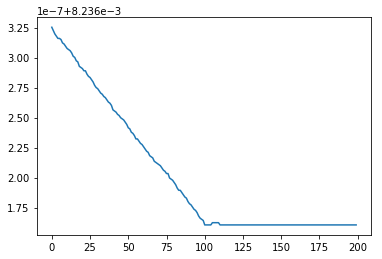

In [20]:
plt.plot(np.array(Data.loss))

In [21]:
#Data.out.x_out[0.0].sort_index()

In [22]:
np.concatenate(Data.out.x_out[0.0].sort_index().values).shape    

(21978,)

In [23]:
np.concatenate(Data.out.y_out[0.0].sort_index().values).shape    

(21978,)

In [24]:
#Data.output = np.array(Data.output)
#Data.state_h = np.concatenate(Data.state_h)
#Data.state_c = np.concatenate(Data.state_c)

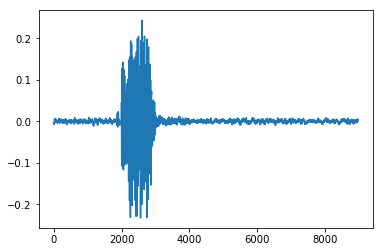

In [ ]:
y = np.concatenate(Data.out.x_out[48].sort_index().values)
plt.plot(y)
dis.Audio(data = y, rate = rate)

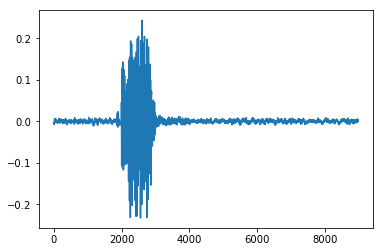

In [ ]:
y = np.concatenate(Data.out.y_orig_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

In [ ]:
y = np.concatenate(Data.out.y_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

In [ ]:
#Data.out.loc[:,'state_h'] = None
#Data.out.loc[:,'state_c'] = None

#for c, (index, row) in enumerate(x_y.iterrows()):
    #print(Data.state_c[c].shape)
    #print(Data.state_c[c].reshape((-1,1)).shape)
#    Data.out.state_h.loc[index, "state_h"] = Data.state_h[c].reshape((-1,1))
#    Data.out.state_c.loc[index, "state_c"] = Data.state_c[c].reshape((-1,1))
    
Data.out.loc[:,'emotion'] = le.inverse_transform(Data.out.emotion.values.astype("int"))
Data.out.to_pickle("dataset/x_y_sample_network_predictnext_learned.pkl")

In [ ]:
Data.out.state_c.values.shape